In [26]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
Truck = pd.read_csv("Trucks.csv")

In [3]:
Truck.head()

,Unnamed: 0,Freq,period,parked,light,collision
0,1,712,0,1,1,0
1,2,613,1,1,1,0
2,3,192,0,1,1,1
3,4,179,1,1,1,1
4,5,2557,0,0,1,0


In [4]:
Truck.tail()

,Unnamed: 0,Freq,period,parked,light,collision
19,20,39,1,1,0,1
20,21,579,0,0,0,0
21,22,494,1,0,0,0
22,23,1018,0,0,0,1
23,24,885,1,0,0,1


In [5]:
Truck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  24 non-null     int64
 1   Freq        24 non-null     int64
 2   period      24 non-null     int64
 3   parked      24 non-null     int64
 4   light       24 non-null     int64
 5   collision   24 non-null     int64
dtypes: int64(6)
memory usage: 1.2 KB


In [6]:
Truck.shape

(24, 6)

In [9]:
Truck = Truck.drop(["Unnamed: 0"], axis = 1)

In [10]:
Truck.head()

,Freq,period,parked,light,collision
0,712,0,1,1,0
1,613,1,1,1,0
2,192,0,1,1,1
3,179,1,1,1,1
4,2557,0,0,1,0


In [11]:
Truck.duplicated().sum()

0

In [12]:
Truck.collision.value_counts(normalize=True)

1    0.5
0    0.5
Name: collision, dtype: float64

In [14]:
Truck.describe(include = 'all')

,Freq,period,parked,light,collision
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1448.916667,0.500000,0.500000,0.333333,0.500000
std,2794.132578,0.510754,0.510754,0.481543,0.510754
min,39.000000,0.000000,0.000000,0.000000,0.000000
25%,188.750000,0.000000,0.000000,0.000000,0.000000
50%,536.500000,0.500000,0.500000,0.000000,0.500000
75%,994.750000,1.000000,1.000000,1.000000,1.000000
max,10749.000000,1.000000,1.000000,1.000000,1.000000


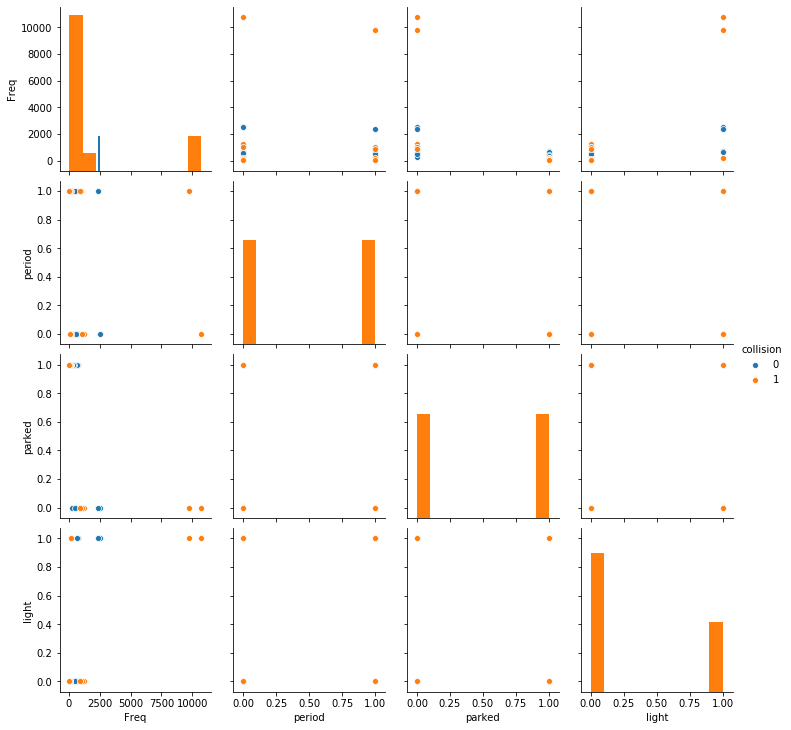

In [13]:
sns.pairplot(Truck ,diag_kind='hist' ,hue='collision');

In [17]:
X = Truck.drop("collision", axis=1)

y = Truck.pop("collision")

In [18]:
Model = LinearDiscriminantAnalysis()

In [19]:
Model.fit(X, y)

LinearDiscriminantAnalysis()

In [20]:
ytrain_predict = Model.predict(X)

In [23]:
ytrain_predict_prob[:1]

array([[0.62496626, 0.37503374]])

In [24]:
Model.score(X, y)

0.5833333333333334

In [28]:
print(classification_report(y, ytrain_predict))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.60      0.50      0.55        12

    accuracy                           0.58        24
   macro avg       0.59      0.58      0.58        24
weighted avg       0.59      0.58      0.58        24

